## Q1

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, LSTM
from keras.optimizers.legacy import SGD
from tensorflow.keras.metrics import Precision, Recall, AUC
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [3]:
# load and prepare data

df = pd.read_csv('gene_expression_data.csv')

X = df.iloc[:,:-1].to_numpy()
y = df['Outcome'].to_numpy()

In [4]:
# build and fit model

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

model = None
model = Sequential()
model.add(Input(shape=(200)))
model.add(Dense(900))
model.add(Activation('relu'))
model.add(Dense(900))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
  
model.compile(loss='BinaryCrossentropy',
             optimizer=SGD(learning_rate=0.1),
             metrics=['accuracy'])
    
#history = model.fit(X_train, y_train, epochs=30, batch_size=100, validation_data=(X_val, y_val), verbose = 0)
history = model.fit(X_train, y_train, epochs=30, batch_size=100, validation_data=(X_val, y_val), verbose = 1)

Epoch 1/30
8/8 [==============================] - 0s 10ms/step - loss: 0.5818 - accuracy: 0.7025 - val_loss: 0.4769 - val_accuracy: 0.8150
Epoch 2/30
8/8 [==============================] - 0s 4ms/step - loss: 0.5339 - accuracy: 0.7500 - val_loss: 0.4777 - val_accuracy: 0.8150
Epoch 3/30
8/8 [==============================] - 0s 4ms/step - loss: 0.5063 - accuracy: 0.7500 - val_loss: 0.4680 - val_accuracy: 0.8150
Epoch 4/30
8/8 [==============================] - 0s 5ms/step - loss: 0.4779 - accuracy: 0.7500 - val_loss: 0.4585 - val_accuracy: 0.8150
Epoch 5/30
8/8 [==============================] - 0s 4ms/step - loss: 0.4497 - accuracy: 0.7550 - val_loss: 0.4363 - val_accuracy: 0.8150
Epoch 6/30
8/8 [==============================] - 0s 4ms/step - loss: 0.4192 - accuracy: 0.7675 - val_loss: 0.4342 - val_accuracy: 0.8200
Epoch 7/30
8/8 [==============================] - 0s 4ms/step - loss: 0.3899 - accuracy: 0.7950 - val_loss: 0.4158 - val_accuracy: 0.8250
Epoch 8/30
8/8 [=================

## Q2

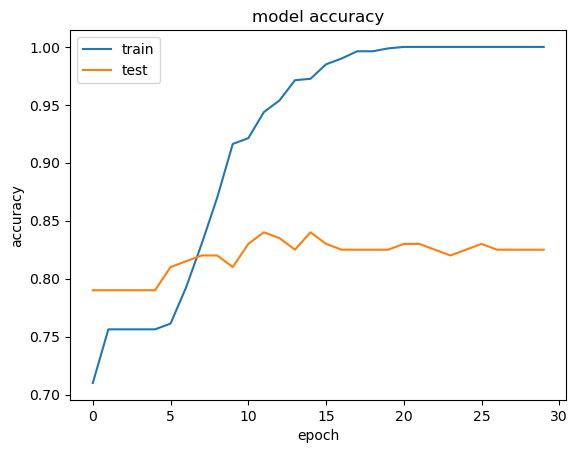

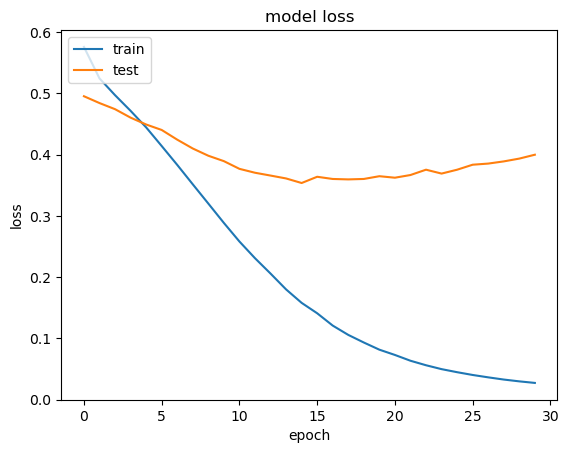

In [73]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

From the plots above, we see that by the end of 30 epochs, the training data is performing well. However, the testing data is still bad, at a low accuracy and high loss. Professor Chiu went over some strategies in class to help with poor testing results: Early Stopping, Regularization, and Dropout.

At 12 epochs or so, the testing data starts to increase in loss and plateau in accuracy. This would be a good point to apply Early Stopping and simply stop at 12 epochs since the training data is already doing pretty well and we can get the best of the testing data scores as well.

Regularization is also a good choice. I would specifically use L2, Ridge Regularization since we have many features in this case, all relevant. Dropout may also be effective in this case since the problem is largely with testing and not training data.

An alternative approach to improve testing data would be cross validation. We have used this before to get more mileage out of our data and improve testing / training.

There is also room for improvement in the loss of the training data, but the biggest difference would be made by simply adding more epochs.

## Q3

In [84]:
#prepare LSTM data

X = X.reshape(1000, 20, 10)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [85]:
#build and fit model

model = None
model = Sequential()

model.add(LSTM(150, input_shape=(20, 10)))  # Adjust input_shape based on your data
model.add(Dense(1, activation='relu'))  # num_classes should match the number of unique classes

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [86]:
history = model.fit(X_train, y_train, epochs=60, batch_size=100, validation_data=(X_val, y_val), verbose = 0)

## Q4

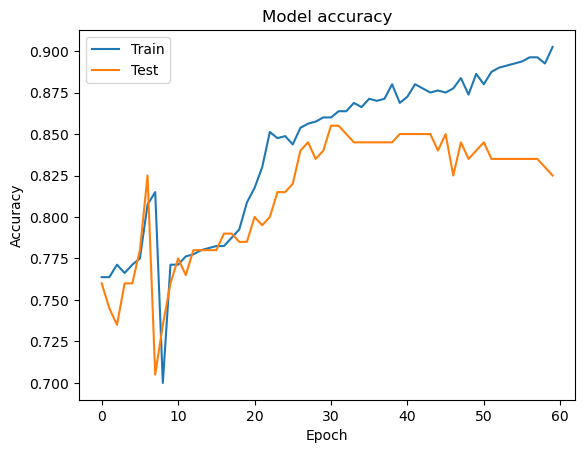

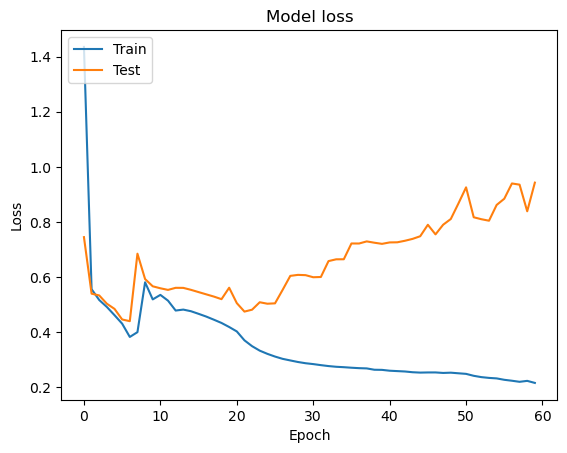

In [87]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

From these graphs, we can see that LSTM yielded better testing results in 30 epochs compared to FCNN, reaching around 0.825. However, the training data was slightly worse, taking longer to improve with LSTM.

I think that LSTM is better for temporal dynamics because even though the training data is slightly worse, the testing data is far more important since it reflects how well the model will perform with unseen / unknown data. I do think it's worth noting that LSTM had some big disturbances early on in training, and generally seems more volatile than FCNN. It's good that as the training continued, the volatility reduced. This means that LSTM may result in some inaccuracies, but with more epochs, results should be reliable up to the average accuracy seen.